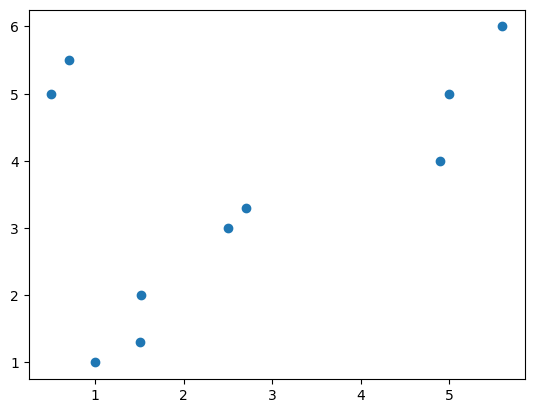

In [6]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# generate some reandom points (manually)
X1 = np.array([0.5,0.7, 1,1.5,1.52,2.5,2.7, 4.9,5,5.6])
X2 = np.array([5,5.5,1,1.3,2,3,3.3,4,5,6])
# plot the data
plt.plot(X1,X2,'o')

# Example_1
Generate manually some data points, store them in a dataframe and then using k-means to cluster the data into different groups.

In [7]:
# store X1, X2 in a data frame as follows
df = pd.DataFrame({'X1':X1,'X2':X2})
display(df)

,X1,X2
0,0.50,5.0
1,0.70,5.5
2,1.00,1.0
3,1.50,1.3
4,1.52,2.0
5,2.50,3.0
6,2.70,3.3
7,4.90,4.0
8,5.00,5.0
9,5.60,6.0


In [8]:
# cluster into two different clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(df)
# get clusters
kmeans.labels_
# add new label column to your dataframe
df['Labels'] = kmeans.predict(df)
display(df)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,X1,X2,Labels
0,0.50,5.0,0
1,0.70,5.5,0
2,1.00,1.0,0
3,1.50,1.3,0
4,1.52,2.0,0
5,2.50,3.0,0
6,2.70,3.3,0
7,4.90,4.0,1
8,5.00,5.0,1
9,5.60,6.0,1


<Axes: xlabel='X1', ylabel='X2'>

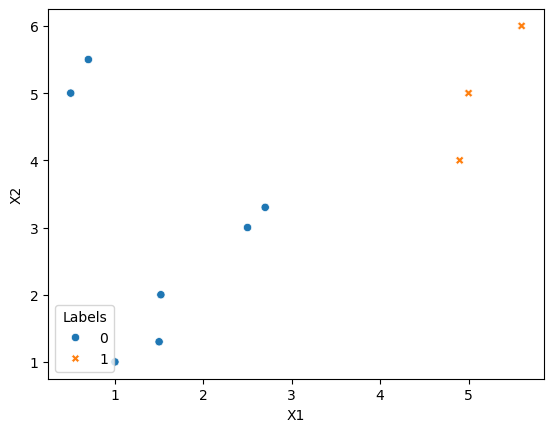

In [9]:
# plot data and map the color of the points to the cluster
sns.scatterplot(data=df, x="X1", y="X2", hue="Labels",style="Labels")

In [10]:
from sklearn.datasets import make_blobs
# simulate some data
X, y = make_blobs (n_samples = 150,
n_features = 2,
centers = 3,
cluster_std = 0.5,
shuffle = True,
random_state = 0)
# lets store the data in a dataframe
df = pd.DataFrame({'X1':X[:,0],'X2':X[:,1],'y':y})
df.head()

,X1,X2,y
0,2.605097,1.225296,1
1,0.532377,3.313389,0
2,0.802314,4.381962,0
3,0.528537,4.497239,0
4,2.618585,0.357698,1


make_blobs function to simulate some data rather than manually creating it. The code generates 150 data points in the 2D space, representing three different groups / clusters.

<Axes: xlabel='X1', ylabel='X2'>

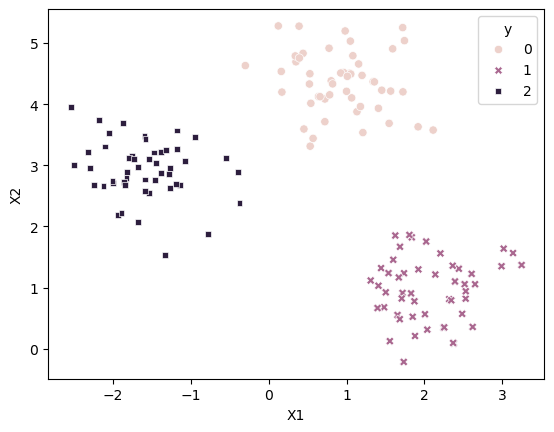

In [12]:
sns.scatterplot(data=df, x="X1", y="X2", hue="y",style="y")

Plot the blobs to visualise them - your blobs will differ if you use a different random_state.

In [13]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
# for clarity, lets check the clusters
kmeans.labels_

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 2, 2, 2, 1, 2, 2, 1, 0, 2, 1, 0, 0, 2, 2, 0, 0, 1, 0, 1, 2, 1,
       2, 2, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 0, 2, 1,
       1, 1, 0, 2, 0, 2, 1, 2, 2, 1, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 2, 0,
       2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 0, 2, 2, 2,
       0, 2, 1, 0, 2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 2, 0, 1, 0, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1])

Fit k-means to the data

In [14]:
df['Cluster'] = kmeans.predict(X)
df.head()

,X1,X2,y,Cluster
0,2.605097,1.225296,1,1
1,0.532377,3.313389,0,2
2,0.802314,4.381962,0,2
3,0.528537,4.497239,0,2
4,2.618585,0.357698,1,1


Now add the labels to the original dataframe

Text(0, 0.5, 'X2')

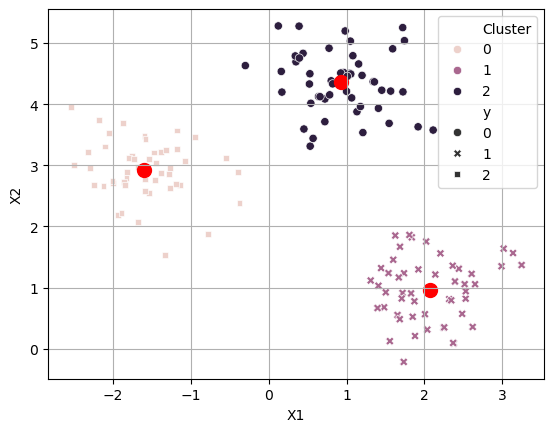

In [15]:
# plot the data and clusters
sns.scatterplot(data=df, x="X1", y="X2", hue="Cluster",style="y")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
s=100, c='red', label = 'Centroids')
plt.grid()
plt.xlabel("X1")
plt.ylabel('X2')

Another way is just to check the y label along the Cluster. Notice here, you don’t check if y == Cluster, instead, you want to check that all instances of y ∈ 1 belongs to the same cluster.

In [17]:
# check clusters centroid
kmeans.cluster_centers_

array([[-1.5947298 ,  2.92236966],
       [ 2.06521743,  0.96137409],
       [ 0.9329651 ,  4.35420712]])

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'X2')

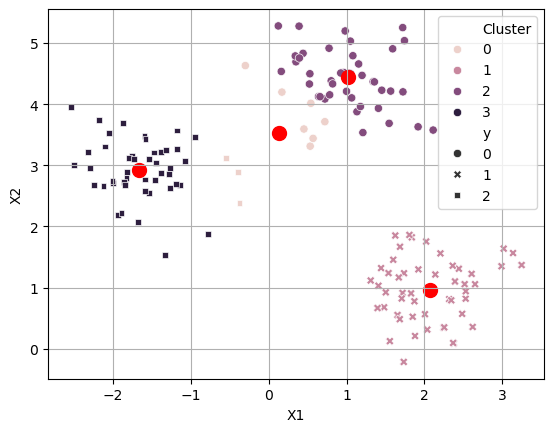

In [18]:
# Optional code for above checking k=4 = would be better in functions
X, y = make_blobs (n_samples = 150,
n_features = 2,
centers = 3,
cluster_std = 0.5,
shuffle = True,
random_state = 0)
# lets store the data in a dataframe
df = pd.DataFrame({'X1':X[:,0],'X2':X[:,1],'y':y})

## Fit the kmeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
df['Cluster'] = kmeans.predict(X)

# plot the data and clusters
sns.scatterplot(data=df, x="X1", y="X2", hue="Cluster",style="y")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
s=100, c='red', label = 'Centroids')
plt.grid()
plt.xlabel("X1")
plt.ylabel('X2')

change the K value to 4 or 2, and see how clustering of the data changes. It should be noted that one of the limitation of k−means is that you have to set the number of clusters in advance. The blobs might yet sub-divide into smaller clusters.